In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%matplotlib inline

Read the data into six separate dataframes.

In [78]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200606, 200530, 200411, 200321, 200208, 200118]
turnstiles_df = get_data(week_nums)

In [79]:
#fix column names
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [80]:
turnstiles_df.DATE.value_counts().sort_index()

01/11/2020    29283
01/12/2020    29365
01/13/2020    29470
01/14/2020    29428
01/15/2020    29324
01/16/2020    29366
01/17/2020    29385
02/01/2020    29433
02/02/2020    29444
02/03/2020    29592
02/04/2020    29519
02/05/2020    29295
02/06/2020    29306
02/07/2020    29331
03/14/2020    29343
03/15/2020    29363
03/16/2020    29430
03/17/2020    29420
03/18/2020    29791
03/19/2020    29998
03/20/2020    29400
04/04/2020    29439
04/05/2020    29340
04/06/2020    29480
04/07/2020    29443
04/08/2020    29367
04/09/2020    29444
04/10/2020    29468
05/23/2020    29507
05/24/2020    29480
05/25/2020    30166
05/26/2020    30697
05/27/2020    30339
05/28/2020    29902
05/29/2020    30323
05/30/2020    30669
05/31/2020    29508
06/01/2020    29668
06/02/2020    29405
06/03/2020    29627
06/04/2020    29591
06/05/2020    29424
Name: DATE, dtype: int64

In [81]:
from datetime import datetime as dt

# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


In [82]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [200606, 200530, 200411, 200321, 200208, 200118]
turnstiles_df_2 = get_data_parse_dt(week_nums)
turnstiles_df_2.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2020-05-30 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,2020-05-30 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,2020-05-30 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,2020-05-30 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,2020-05-30 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [83]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
201219,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/30/2020,00:00:00,REGULAR,15553543,3431727,2020-05-30 00:00:00
201220,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/30/2020,04:00:00,REGULAR,15553544,3431735,2020-05-30 04:00:00
201221,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/30/2020,08:00:00,REGULAR,15553639,3431743,2020-05-30 08:00:00
201222,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/30/2020,12:00:00,REGULAR,15553723,3431771,2020-05-30 12:00:00
201223,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/30/2020,16:00:00,REGULAR,15553841,3431811,2020-05-30 16:00:00


In [84]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
187403,H001,R175,00-00-02,8 AV,2020-02-01 00:00:00,2
233112,J009,R378,00-00-01,MYRTLE AV,2020-05-27 05:00:00,2
828378,R141,R031,00-03-01,34 ST-PENN STA,2020-03-18 16:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


In [85]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [86]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-01-11 03:00:00,1
828387,R141,R031,00-03-01,34 ST-PENN STA,2020-03-20 04:00:00,1
828385,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 20:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


In [87]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [88]:
# Fix the fact that entries are cumulative
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

turnstiles_daily.head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/11/2020,7340476,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0


In [89]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [90]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1258 7896758.0
2330 9410826.0
4 7832194.0
1687 1562921047.0
848 1180101.0
4875 7244466.0
5305 1196338.0
43 6777224.0
17224 1083160.0
294 6612092.0
107 8235039.0
2033924 364303.0
36 5666890.0
25 8800439.0
475952125 7379372.0
2920 3114791.0
618862 2624193.0
17126450 19676957.0
15066625 17126282.0
25528773 15065804.0
12316490 25525671.0
72 1015375.0
1616 2632946.0
2800 3567412.0
13865 6119754.0
49 8294808.0
15 2090862.0
18 168627933.0
1175 4733498.0
83886121 22940.0
16965 11957933.0
2937635 79502.0
321184286 5589416.0
307624182 321184285.0
673 4895014.0
32 1317615.0
4785471 11470775.0
47325 4829073.0
6031 2011827.0
270537780 536177.0
2323 13973128.0
1062 2302008.0
3139 2405464.0
395233 2064683.0
111220 6561938.0
2010 22737699.0
18023 3853709.0
524538 118139950.0
14336 69155900.0
4410 9499451.0
8988 8436536.0
2863 1936022.0
25316 1476413.0
1245971397 2299884.0
1779 3529732.0
60 7675482.0
8369771 1820899.0
578409 2805680.0
2162 9037638.0
3779 1501563.0
1627393907 6366854.0
203 1408008.0
12 

In [91]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1258 7896758.0
2330 9410826.0
4 7832194.0
1687 1562921047.0
848 1180101.0
4875 7244466.0
5305 1196338.0
43 6777224.0
17224 1083160.0
294 6612092.0
107 8235039.0
2033924 364303.0
36 5666890.0
25 8800439.0
475952125 7379372.0
2920 3114791.0
618862 2624193.0
17126450 19676957.0
15066625 17126282.0
25528773 15065804.0
12316490 25525671.0
72 1015375.0
1616 2632946.0
2800 3567412.0
13865 6119754.0
49 8294808.0
15 2090862.0
18 168627933.0
1175 4733498.0
83886121 22940.0
16965 11957933.0
2937635 79502.0
321184286 5589416.0
307624182 321184285.0
673 4895014.0
32 1317615.0
4785471 11470775.0
47325 4829073.0
6031 2011827.0
270537780 536177.0
2323 13973128.0
1062 2302008.0
3139 2405464.0
395233 2064683.0
111220 6561938.0
2010 22737699.0
18023 3853709.0
524538 118139950.0
14336 69155900.0
4410 9499451.0
8988 8436536.0
2863 1936022.0
25316 1476413.0
1245971397 2299884.0
1779 3529732.0
60 7675482.0
8369771 1820899.0
578409 2805680.0
2162 9037638.0
3779 1501563.0
1627393907 6366854.0
203 1408008.0
12 

In [92]:
turnstiles_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0
5,A002,R051,02-00-00,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0
6,A002,R051,02-00-00,59 ST,01/17/2020,7347954,01/16/2020,7346629.0,1325.0
7,A002,R051,02-00-00,59 ST,02/01/2020,7364808,01/17/2020,7347954.0,16854.0
8,A002,R051,02-00-00,59 ST,02/02/2020,7365408,02/01/2020,7364808.0,600.0
9,A002,R051,02-00-00,59 ST,02/03/2020,7366662,02/02/2020,7365408.0,1254.0
10,A002,R051,02-00-00,59 ST,02/04/2020,7367905,02/03/2020,7366662.0,1243.0


VISUALIZATIONS

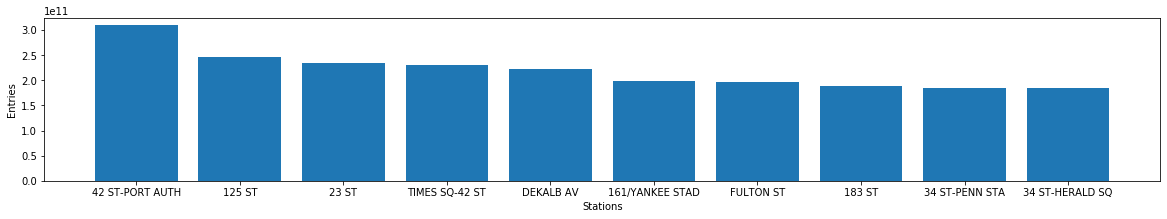

In [93]:
# Create a bar graph for the top 10 stations and their entries
stations = turnstiles_daily.groupby(['STATION']).sum()['ENTRIES']
ascending_stations = pd.Series.sort_values(stations, ascending=False)
top_10 = ascending_stations.head(10)

plt.figure(figsize=(20,3))
plt.bar(top_10.index, top_10.values)
plt.xlabel('Stations')
plt.ylabel('Entries')

plt.show()

In [94]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0
5,A002,R051,02-00-00,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0


In [102]:
# INCORRECT FOR SOME REASON??? This is just to test out why the days don't correspond 
# to the date in the next block. 
s = pd.date_range('2019-01-08', '2020-01-12', freq='D').to_series()
s.dt.dayofweek

2019-01-08    1
2019-01-09    2
2019-01-10    3
2019-01-11    4
2019-01-12    5
             ..
2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
2020-01-12    6
Freq: D, Length: 370, dtype: int64

In [97]:
#Make a new column to keep track of the day of the week (ERROR)
turnstiles_daily['DAYOFWEEK'] = pd.to_datetime(turnstiles_daily['DATE']).dt.dayofweek
turnstiles_daily['WEEKDAY'] = turnstiles_daily['DAYOFWEEK'].astype("category")
turnstiles_daily['WEEKDAY'].cat.categories = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAYOFWEEK,WEEKDAY
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0,6,Sunday
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0,0,Monday
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0,1,Tuesday
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0,2,Wednesday
5,A002,R051,02-00-00,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0,3,Thursday


In [98]:
#Identify the top three stations with the most traffic
top_3 = ascending_stations.head(3)
top_3
top_3.index

Index(['42 ST-PORT AUTH', '125 ST', '23 ST'], dtype='object', name='STATION')

In [121]:
#Pick out the rows of the top three stations with the most traffic
top_3_stations = ((turnstiles_daily["STATION"] == "42 ST-PORT AUTH") | (turnstiles_daily["STATION"] == "125 ST") | (turnstiles_daily["STATION"] == "23 ST"))
df_top_three = turnstiles_daily[top_3_stations]
df_top_three.sample(5, random_state=42)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAYOFWEEK,WEEKDAY
146080,R174,R034,00-00-00,125 ST,01/16/2020,49979,01/15/2020,47822.0,2157.0,3,Thursday
52337,N062A,R010,00-00-02,42 ST-PORT AUTH,02/02/2020,4453129,02/01/2020,4452708.0,421.0,6,Sunday
136024,R132,R190,01-00-01,23 ST,04/04/2020,78023,03/20/2020,76993.0,1030.0,5,Saturday
156586,R227A,R131,01-06-01,23 ST,01/12/2020,514930,01/11/2020,514846.0,84.0,6,Sunday
167228,R258,R132,00-00-01,125 ST,03/17/2020,4946112,03/16/2020,4945260.0,852.0,1,Tuesday


In [124]:
#Group the top three stations by station and weekday
grouped = df_top_three.groupby(['STATION', 'WEEKDAY'])['ENTRIES'].sum().reset_index()
grouped.head()

,STATION,WEEKDAY,ENTRIES
0,125 ST,Monday,36012823173
1,125 ST,Tuesday,36005764673
2,125 ST,Wednesday,36006438016
3,125 ST,Thursday,36006648544
4,125 ST,Friday,36006856177


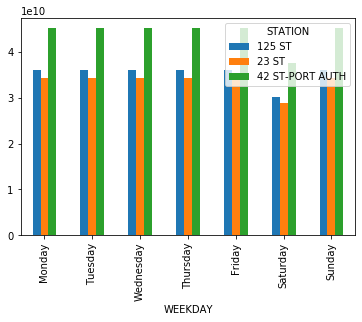

In [128]:
pd.crosstab(index=df_top_three['WEEKDAY'], columns=df_top_three['STATION'],
           values=df_top_three['ENTRIES'], aggfunc=sum).plot(kind='bar');